In [4]:
#Importando dados com o pandas
import pandas as pd

In [5]:
#Importando dataset de treino
base = pd.read_csv('train.csv')

In [9]:
#visualizar a base
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [10]:
#Retornando o shape da base
base.shape

(1460, 81)

In [11]:
#Informaçoes da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
#valores vazios (isnull), para somar usamos (sum) .sort_values(ascending=False) Criar um filtro ascedente do maior para o menor | .head(10) Define o numero de linhas que serão apresentadas
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

In [29]:
#Eliminando as colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0])> 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#Eliminando essas colunas
base = base.drop(eliminar,axis=1)

In [ ]:
# Selecionando apenas colunas numéricas caso a coluna tenha valor diferente de objetc indicará True sendo assim concluimos que o resto será apenas numérico
colunas = base.columns [base.dtypes != 'object']

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [39]:
# E criar uma nova base com esses valores 
base2 = base.loc[:,colunas]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [41]:
# Verificando os valores vazios
base2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [49]:
# Verificando os valores vazios
base2 = base2.fillna(-1)

Criando o modelo https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Treino e teste

In [52]:
# Selecionando X e Y
X = base2.drop('SalePrice',axis=1)
y = base2.SalePrice

In [53]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [54]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [56]:
#importando a LinearRegression
from sklearn.linear_model import LinearRegression

In [57]:
#Criando um regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [58]:
# Faendo a previsão para dados de teste
y_rl = reg_rl.predict(X_test)

In [59]:
#importando a arvore de regressão
from sklearn import tree

In [60]:
#criando o regressor e fazendo o fit com os dados de treino 
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [61]:
# Fazendo a previsão 
y_ar = reg_ar.predict(X_test)

In [62]:
#Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [65]:
#Criando regresso e fazendo fit com dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)


In [66]:
# Fazendo  a previsão
y_knn =  reg_knn.predict(X_test)

In [68]:
#Importando o erro médio absoluto 
from sklearn.metrics import mean_absolute_error

In [69]:
#Importando o Erro médio quadrático
from sklearn.metrics import mean_squared_error

In [70]:
# Avaliando o erro de regressão
print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test,y_rl))

23763.187393064236
1533982883.4449635


In [ ]:
# Avaliando arvore de decisão
print(mean_absolute_error(y_test,y_ar))
print(mean_squared_error(y_test,y_ar))

23763.187393064236
1533982883.4449635


In [73]:
# Avaliando Knn
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))

33273.08298755187
2733937586.841286


In [74]:
# Importando o matplotlib
import matplotlib.pyplot as plt

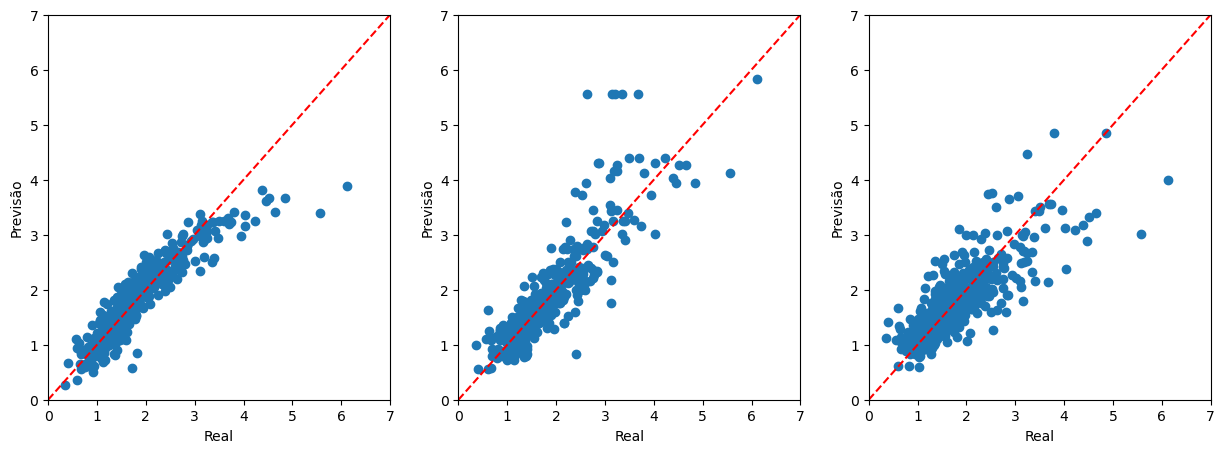

In [75]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

In [108]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [109]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [111]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar,axis=1)

In [117]:
# Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [118]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:,colunas2]

In [119]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [120]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [121]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

Agora podemos usar o nosso modelo e ajustar os dados para usarmos no Kagle

In [122]:
# Vamos usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [123]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [124]:
# E extrair somente o Id e o SalePrice
resultado = teste[['Id','SalePrice']]
resultado.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [125]:
# Podemos então exportar essa base
resultado.to_csv('resultado.csv',index=False)